# Matrizes de Correlação
## Análise de complementaridade espacial da energia solar-solar e vento-vento

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Ajuste no formato dos dados

In [2]:
# Tentar carregar os arquivos com codificação UTF-16 e separador por tabulação
sudeste_solar = pd.read_csv("SOLAR_SUDESTE.csv", encoding="utf-16", sep="\t")
sul_solar = pd.read_csv("SOLAR_SUL.csv", encoding="utf-16", sep="\t")
norte_solar = pd.read_csv("SOLAR_NORTE.csv", encoding="utf-16", sep="\t")
nordeste_solar = pd.read_csv("SOLAR_NORDESTE.csv", encoding="utf-16", sep="\t")
sudeste_vento = pd.read_csv("EOLICA_SUDESTE.csv", encoding="utf-16", sep="\t")
sul_vento = pd.read_csv("EOLICA_SUL.csv", encoding="utf-16", sep="\t")
norte_vento = pd.read_csv("EOLICA_NORTE.csv", encoding="utf-16", sep="\t")
nordeste_vento = pd.read_csv("EOLICA_NORDESTE.csv", encoding="utf-16", sep="\t")

In [3]:
sudeste_series_solar = sudeste_solar.iloc[2:, 8:].apply(pd.to_numeric, errors='coerce').astype(float).mean(axis=0)
sul_series_solar = sul_solar.iloc[2:, 8:].apply(pd.to_numeric, errors='coerce').astype(float).mean(axis=0)
norte_series_solar = norte_solar.iloc[2:, 8:].apply(pd.to_numeric, errors='coerce').astype(float).mean(axis=0)
nordeste_series_solar = nordeste_solar.iloc[2:, 8:].apply(pd.to_numeric, errors='coerce').astype(float).mean(axis=0)

sudeste_series_vento = sudeste_vento.iloc[2:, 8:].apply(pd.to_numeric, errors='coerce').astype(float).mean(axis=0)
sul_series_vento = sul_vento.iloc[2:, 8:].apply(pd.to_numeric, errors='coerce').astype(float).mean(axis=0)
norte_series_vento = norte_vento.iloc[2:, 8:].apply(pd.to_numeric, errors='coerce').astype(float).mean(axis=0)
nordeste_series_vento = nordeste_vento.iloc[2:, 8:].apply(pd.to_numeric, errors='coerce').astype(float).mean(axis=0)

# Combinar tudo em um único DataFrame (Solar)
df_solar = pd.DataFrame({
    "Sudeste": sudeste_series_solar.values,
    "Sul": sul_series_solar.values,
    "Norte": norte_series_solar.values,
    "Nordeste": nordeste_series_solar.values
})
df_solar

,Sudeste,Sul,Norte,Nordeste
0,NaN,NaN,NaN,NaN
1,2.733,1.545,236.0,1.696
2,2.981,1.206,228.0,2.113
3,2.915,1.226,224.0,2.177
4,2.649,1.417,267.0,2.613
...,...,...,...,...
362,4.460,1.924,504.0,3.393
363,4.572,1.970,473.0,3.014
364,3.995,1.776,407.0,2.773
365,4.688,1.690,459.0,3.128


In [4]:
# Combinar tudo em um único DataFrame (Eolica)
df_eolica = pd.DataFrame({
    "Sudeste": sudeste_series_vento.values,
    "Sul": sul_series_vento.values,
    "Norte": norte_series_vento.values,
    "Nordeste": nordeste_series_vento.values
})
df_eolica

,Sudeste,Sul,Norte,Nordeste
0,NaN,NaN,NaN,NaN
1,8.0,858.000,48.0,2.235
2,8.0,1.089,86.0,2.828
3,8.0,1.219,183.0,3.981
4,8.0,1.151,281.0,4.374
...,...,...,...,...
362,6.0,534.000,353.0,14.296
363,6.0,430.000,362.0,13.751
364,5.0,332.000,337.0,12.080
365,5.0,552.000,165.0,10.821


### Normalização
O método de normalização utilizado, no artigo, é de mínimo e máximo
$$
X_\text{normalizado} = \frac{X - X_\text{mín}}{X_\text{máx} - X_\text{mín}}
$$

In [6]:
# Remover linhas com valores ausentes
df_solar_clean = df_solar.dropna()
df_eolica_clean = df_eolica.dropna()
# Normalizar as séries entre 0 e 1
scaler_solar = MinMaxScaler()
df_normalized_solar = pd.DataFrame(scaler_solar.fit_transform(df_solar_clean), columns=df_solar_clean.columns)

scaler_eolica = MinMaxScaler()
df_normalized_eolica = pd.DataFrame(scaler_eolica.fit_transform(df_eolica_clean), columns=df_eolica_clean.columns)

### Cálculo da Correlação de Kendall (τ)

$$
 \tau = P[(x_{t1} - x_{t2})(y_{t1} - y_{t2}) > 0] - P[(x_{t1} - x_{t2})(y_{t1} - y_{t2}) < 0]
$$

- $P$ : proporção de pares ordenados,
- $x_{t1}, x_{t2}$ e $y_{t1}, y_{t2}$ são valores das séries $X$ e $Y$,
- Quanto menor (ou mais negativa) for a correlação, maior o potencial de uma fonte compensar a outra.

In [7]:
# Calcular a matriz de correlação de Kendall
kendall_corr_solar = df_normalized_solar.corr(method='kendall')
# Calcular a matriz de correlação de Kendall
kendall_corr_eolica = df_normalized_eolica.corr(method='kendall')

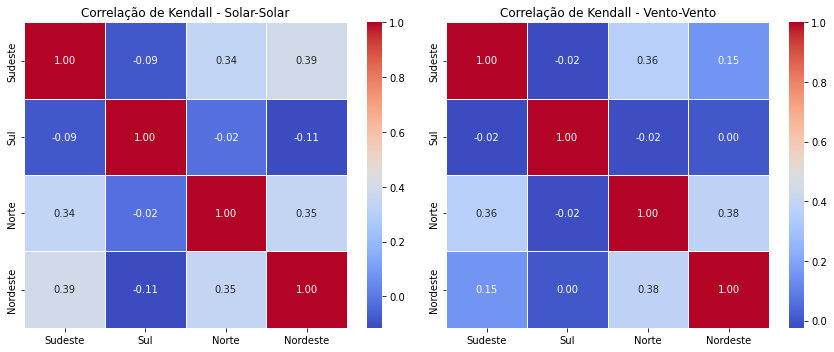

In [8]:
# Plotar o heatmap da matriz de correlação
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(kendall_corr_solar, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Correlação de Kendall - Solar-Solar')

sns.heatmap(kendall_corr_eolica, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Correlação de Kendall - Vento-Vento')
plt.tight_layout()
plt.show()

### Cálculo do índice de Flutuação 

$$
\text{Índice de Flutuação} = \left( \frac{\frac{\sigma_1 + \sigma_2}{2} - \sigma_c}{\frac{\sigma_1 + \sigma_2}{2}} \right)
$$

Onde:
- $ \sigma_1$ : desvio padrão da primeira série,
- $ \sigma_2 $: desvio padrão da segunda série,
- $ \sigma_c $: desvio padrão da média das duas séries (série combinada),
- O índice representa a **redução percentual da variabilidade** ao combinar as duas séries.

Valores mais altos indicam **melhor complementaridade** entre as regiões analisadas.

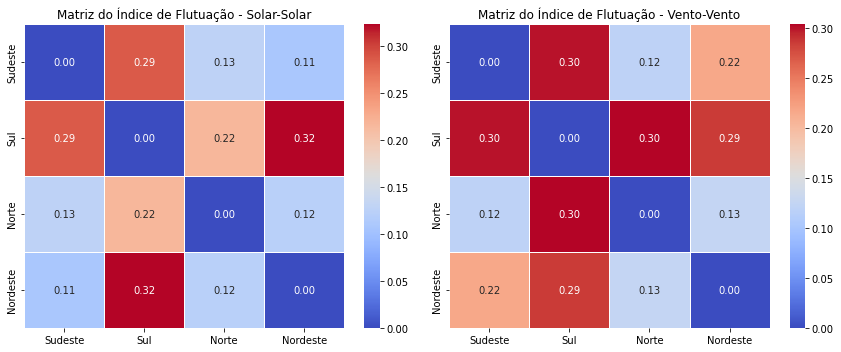

In [12]:
# Função para calcular o índice de flutuação entre duas séries
def calcular_indice_flutuacao(serie1, serie2):
    combinada = (serie1 + serie2) / 2
    std_1 = np.std(serie1)
    std_2 = np.std(serie2)
    std_comb = np.std(combinada)
    media_std = (std_1 + std_2) / 2
    return ((media_std - std_comb) / media_std)
# Inicializar a matriz de flutuação
regioes = df_normalized_solar.columns
n = len(regioes)
flutuacao_matrix_solar = pd.DataFrame(np.zeros((n, n)), index=regioes, columns=regioes)

# Preencher a matriz com o índice de flutuação entre pares de regiões
for i in range(n):
    for j in range(n):
        if i != j:
            flutuacao_matrix_solar.iloc[i, j] = calcular_indice_flutuacao(df_normalized_solar.iloc[:, i], df_normalized_solar.iloc[:, j])
        else:
            flutuacao_matrix_solar.iloc[i, j] = 0  # ou np.nan, se preferir

# Inicializar a matriz de flutuação
regioes = df_normalized_eolica.columns
n = len(regioes)
flutuacao_matrix_eolica = pd.DataFrame(np.zeros((n, n)), index=regioes, columns=regioes)

for i in range(n):
    for j in range(n):
        if i != j:
            flutuacao_matrix_eolica.iloc[i, j] = calcular_indice_flutuacao(df_normalized_eolica.iloc[:, i], df_normalized_eolica.iloc[:, j])
        else:
            flutuacao_matrix_eolica.iloc[i, j] = 0  # ou np.nan, se preferir
            
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(flutuacao_matrix_solar, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0])
axes[0].set_title('Matriz do Índice de Flutuação - Solar-Solar')
sns.heatmap(flutuacao_matrix_eolica, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1])
axes[1].set_title('Matriz do Índice de Flutuação - Vento-Vento')
plt.tight_layout()
plt.show()

In [ ]:
# Função para calcular o índice de flutuação entre duas séries
def calcular_indice_flutuacao(serie1, serie2):
    combinada = (serie1 + serie2) / 2
    std_1 = np.std(serie1)
    std_2 = np.std(serie2)
    std_comb = np.std(combinada)
    media_std = (std_1 + std_2) / 2
    return ((media_std - std_comb) / media_std)
# Inicializar a matriz de flutuação
regioes = df_normalized.columns
n = len(regioes)
flutuacao_matrix = pd.DataFrame(np.zeros((n, n)), index=regioes, columns=regioes)

# Preencher a matriz com o índice de flutuação entre pares de regiões
for i in range(n):
    for j in range(n):
        if i != j:
            flutuacao_matrix.iloc[i, j] = calcular_indice_flutuacao(df_normalized.iloc[:, i], df_normalized.iloc[:, j])
        else:
            flutuacao_matrix.iloc[i, j] = 0  # ou np.nan, se preferir

plt.figure(figsize=(6, 5))
sns.heatmap(flutuacao_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz do Índice de Flutuação - Solar-Solar')
plt.tight_layout()
plt.show()

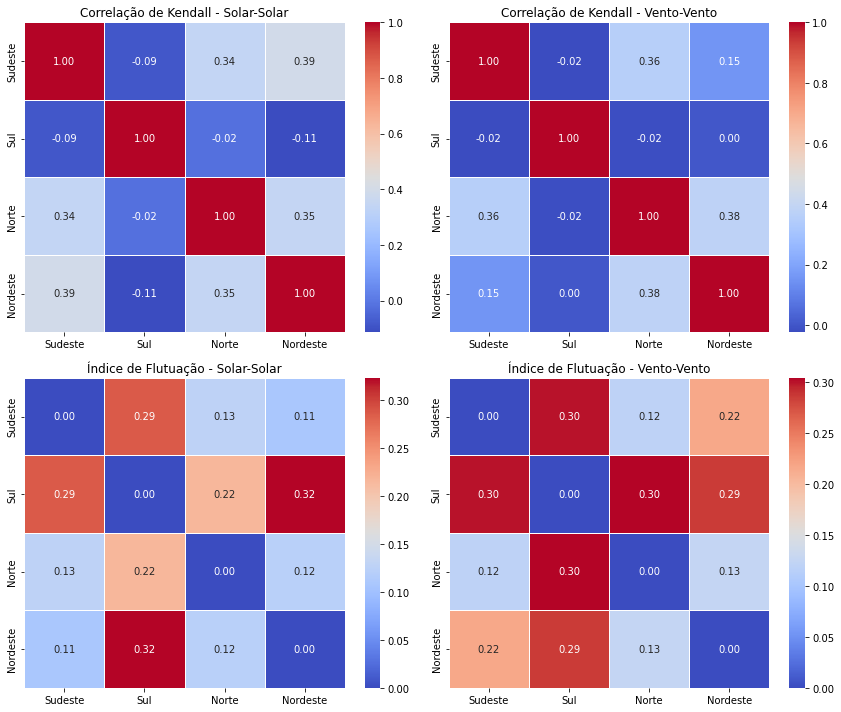

In [15]:
# Criar figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Linha 1 - Correlação de Kendall
sns.heatmap(kendall_corr_solar, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0, 0])
axes[0, 0].set_title('Correlação de Kendall - Solar-Solar')

sns.heatmap(kendall_corr_eolica, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Correlação de Kendall - Vento-Vento')

# Linha 2 - Índice de Flutuação
sns.heatmap(flutuacao_matrix_solar, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1, 0])
axes[1, 0].set_title('Índice de Flutuação - Solar-Solar')

sns.heatmap(flutuacao_matrix_eolica, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Índice de Flutuação - Vento-Vento')

# Ajustar layout
plt.tight_layout()
plt.savefig('matrizes.png', dpi=300, bbox_inches='tight')
plt.show()